In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import cross_val_score, StratifiedKFold
import matplotlib.pyplot as plt
import tensorflow as tf

# Cargar el conjunto de datos
df = pd.read_csv("MalBehavD-V1.csv", header=0)
df.head()

,sha256,labels,0,1,2,3,4,5,6,7,...,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,Unnamed: 172,Unnamed: 173,Unnamed: 174,Unnamed: 175,Unnamed: 176
0,5c18291c481a192ed5003084dab2d8a117fd3736359218...,0,LdrUnloadDll,CoUninitialize,NtQueryKey,NtDuplicateObject,GetShortPathNameW,GetSystemInfo,IsDebuggerPresent,GetSystemWindowsDirectoryW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4683faf3da550ffb594cf5513c4cbb34f64df85f27fd1c...,0,NtOpenMutant,GetForegroundWindow,NtQueryKey,DrawTextExW,NtSetInformationFile,RegQueryValueExA,LdrGetProcedureAddress,CoUninitialize,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9a0aea1c7290031d7c3429d0e921f107282cc6eab854ee...,0,GetForegroundWindow,DrawTextExW,GetSystemInfo,IsDebuggerPresent,GetSystemWindowsDirectoryW,NtQueryValueKey,RegCloseKey,GetFileAttributesW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,e0f3e4d5f50afd9c31e51dd9941c5a52d57c7c524f5d11...,0,NtQueryValueKey,LdrUnloadDll,GlobalMemoryStatus,WriteConsoleA,NtOpenKey,LdrGetProcedureAddress,NtTerminateProcess,NtClose,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ec2b6d29992f13e74015ff0b129150b4afae15c593e4b7...,0,LdrUnloadDll,GetSystemTimeAsFileTime,NtOpenKey,WSAStartup,SetUnhandledExceptionFilter,NtTerminateProcess,NtClose,NtAllocateVirtualMemory,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


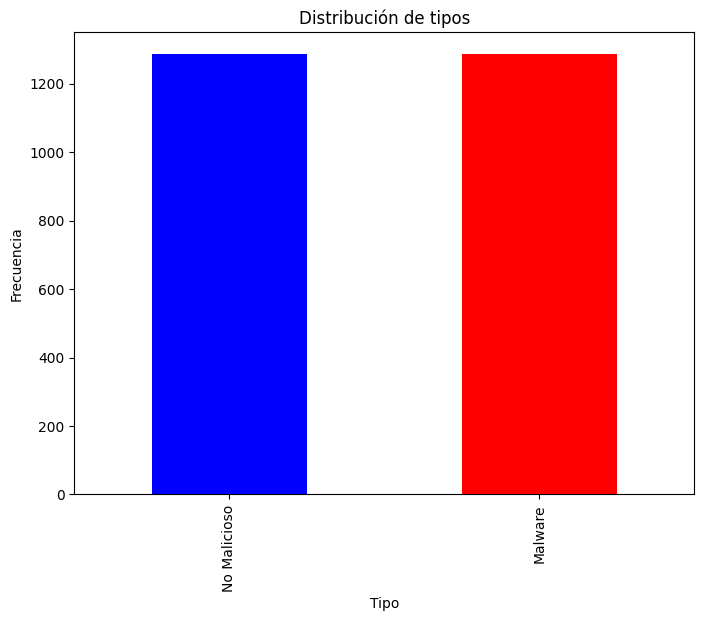

In [19]:
plt.figure(figsize=(8, 6))
df['labels'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Distribución de tipos')
plt.xlabel('Tipo')
plt.ylabel('Frecuencia')
plt.gca().set_xticklabels(['No Malicioso', 'Malware'])
plt.show()

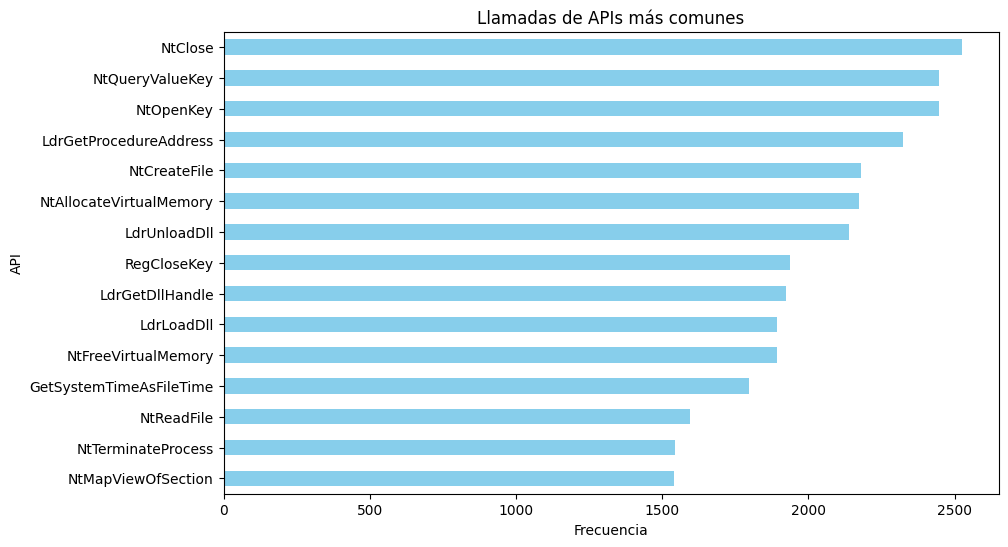

In [20]:
calls_frequency = df.drop(['sha256', 'labels'], axis=1).stack().value_counts()
top_calls = calls_frequency.head(15)

plt.figure(figsize=(10, 6))
top_calls.plot(kind='barh', color='skyblue')
plt.title('Llamadas de APIs más comunes')
plt.xlabel('Frecuencia')
plt.ylabel('API')
plt.gca().invert_yaxis()
plt.show()

In [21]:
le = LabelEncoder()
df = df.apply(le.fit_transform)

# Dividir datos en características (X) y etiquetas (y)
X = df.drop(['sha256', 'labels'], axis=1)
y = df['labels']

X

,0,1,2,3,4,5,6,7,8,9,...,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,Unnamed: 172,Unnamed: 173,Unnamed: 174,Unnamed: 175,Unnamed: 176
0,26,2,65,52,29,31,44,37,63,31,...,1,1,1,1,1,1,1,1,1,1
1,35,19,65,9,78,92,46,1,85,98,...,1,1,1,1,1,1,1,1,1,1
2,14,7,26,35,34,77,94,22,105,73,...,1,1,1,1,1,1,1,1,1,1
3,39,31,35,95,66,43,85,54,62,48,...,1,1,1,1,1,1,1,1,1,1
4,26,23,60,94,104,83,56,53,81,48,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2565,3,13,1,77,44,13,83,2,43,85,...,1,1,1,1,1,1,1,1,1,1
2566,31,62,39,68,93,83,78,93,71,66,...,1,1,1,1,1,1,1,1,1,1
2567,10,51,1,77,44,31,100,79,85,25,...,1,1,1,1,1,1,1,1,1,1
2568,28,30,90,21,33,44,45,70,85,51,...,1,1,1,1,1,1,1,1,1,1


In [22]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
2565    1
2566    1
2567    1
2568    1
2569    1
Name: labels, Length: 2570, dtype: int64


In [23]:
# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.1)

# Evaluar el modelo en el conjunto de prueba
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("ROC AUC:", roc_auc)

Epoch 1/15
51/51 [==============================] - 1s 6ms/step - loss: 0.5461 - accuracy: 0.7437 - val_loss: 0.4743 - val_accuracy: 0.7722
Epoch 2/15
51/51 [==============================] - 0s 3ms/step - loss: 0.4091 - accuracy: 0.8159 - val_loss: 0.4285 - val_accuracy: 0.7833
Epoch 3/15
51/51 [==============================] - 0s 3ms/step - loss: 0.3515 - accuracy: 0.8443 - val_loss: 0.3879 - val_accuracy: 0.8167
Epoch 4/15
51/51 [==============================] - 0s 4ms/step - loss: 0.3135 - accuracy: 0.8616 - val_loss: 0.3824 - val_accuracy: 0.8667
Epoch 5/15
51/51 [==============================] - 0s 4ms/step - loss: 0.2780 - accuracy: 0.8882 - val_loss: 0.3842 - val_accuracy: 0.8389
Epoch 6/15
51/51 [==============================] - 0s 3ms/step - loss: 0.2499 - accuracy: 0.9055 - val_loss: 0.3588 - val_accuracy: 0.8611
Epoch 7/15
51/51 [==============================] - 0s 3ms/step - loss: 0.2262 - accuracy: 0.9129 - val_loss: 0.3658 - val_accuracy: 0.8556
Epoch 8/15
51/51 [==